In [231]:
# Import libraries:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
# Load data:
iris = pd.read_csv('Iris.csv', index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [233]:
# Checking missing values:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [234]:
# Encode column Species to 0, 1 and 2:
iris['Species'] = LabelEncoder().fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


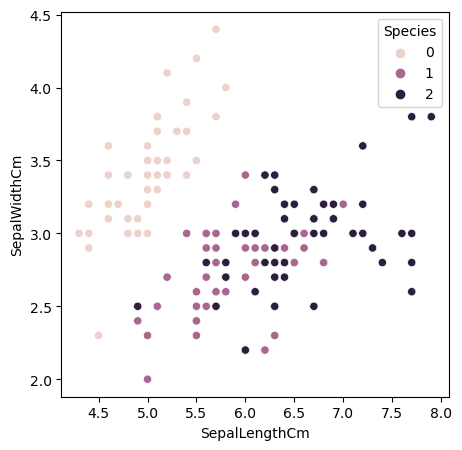

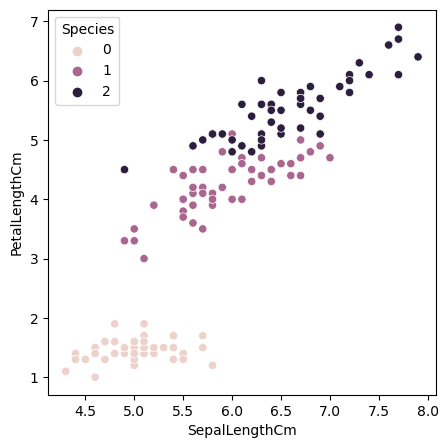

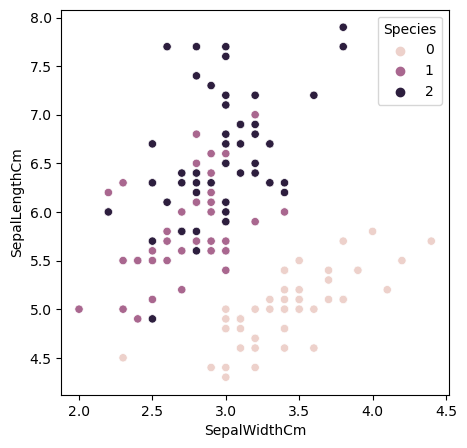

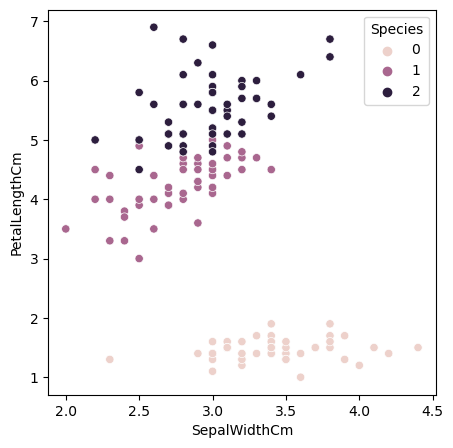

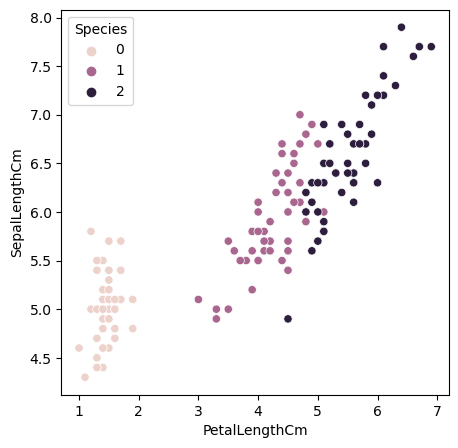

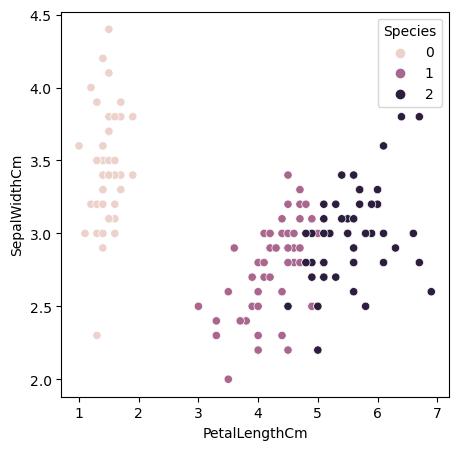

In [235]:
# Visualising the relationships between the first four columns:
for i in iris.columns[0:3]:
  for j in iris.columns[0:3]:
    if i != j:
      fig = plt.figure(figsize=(5,5))
      sns.scatterplot(data=iris, x= iris[i], y=iris[j], hue='Species')
      

The most promising plots for separating into clusters are: Petal length vs Sepal length and Petal Length vs Sepal width. 

The pdf ask for K-nearest neighbours and accuracy score, but I assume there was a mistake and I should perform K-means model and the silhouette score.


In [236]:
# Petal length vs Sepal length: 
# Prepare data for training:
X = iris[['PetalLengthCm','SepalLengthCm']].values.reshape(-1,2)  
print('Data size:', X.shape)

Data size: (150, 2)


In [237]:
# Scaling to unify measurements:
X = preprocessing.scale(X) 

In [238]:
# Running kmeans with 3 clusters,
kmeans = KMeans(n_clusters = 3, random_state = 0, init='k-means++').fit(X)
# Predict with kmeans:
y_pred = kmeans.predict(X)
# Calculate Silhouette score:
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
print("silhouette_score:", score)

silhouette_score: 0.54


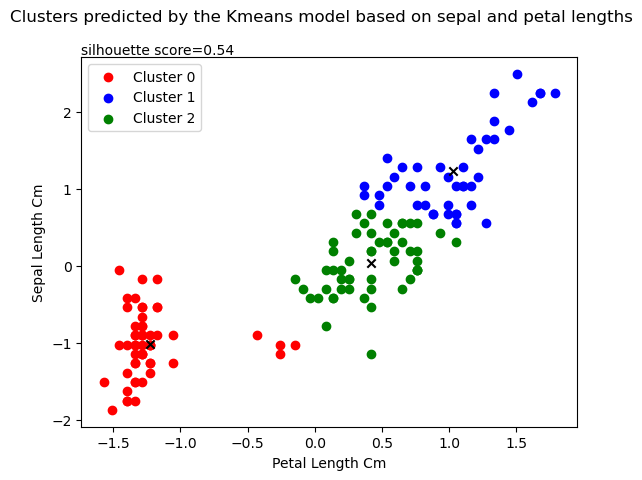

In [239]:
# Visualising the clusters predicted by the model:
colours = 'rbgcmy'
for i in range(3):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i,1], c = colours[i], label = 'Cluster {}'.format(i))
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='x', c = 'black')
# Adding the score to the scatterplot:
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.suptitle('Clusters predicted by the Kmeans model based on sepal and petal lengths')
plt.title('silhouette score={}'.format(score), loc='left', fontdict={'fontsize': 10}, pad=-14)
plt.xlabel('Petal Length Cm')
plt.ylabel('Sepal Length Cm')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

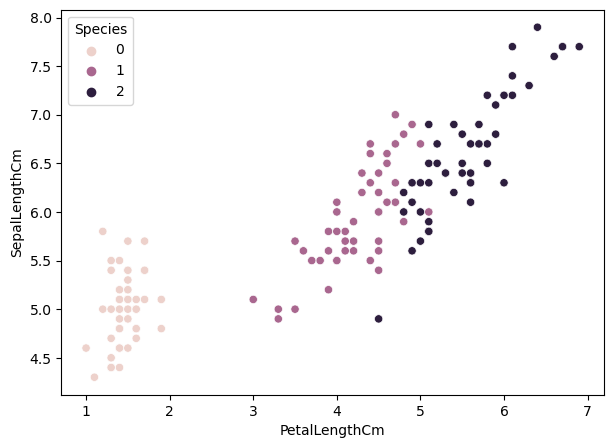

In [240]:
# To compare, let's look at the real distribution of species based on Petal and Sepal Lengths:
fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=iris, x= iris['PetalLengthCm'], y= iris['SepalLengthCm'], hue='Species')

The Silhouette score was only 0.54, which implies the clusters are not well separated. We can see that the model had some problems to correctly classify instances to correct species category, especially for species 1 and 2 (Iris virginica and Iris versicolor) - (clusters 1 and 2).

In [241]:
# Now, the same for the second relation: Petal length vs Sepal width: 
# Prepare data for training:
X = iris[['PetalLengthCm','SepalWidthCm']].values.reshape(-1,2)  
print('Data size:', X.shape)

Data size: (150, 2)


In [242]:
# Scaling to unify measurements:
X = preprocessing.scale(X) 

In [243]:
# Running kmeans with 3 clusters,
kmeans = KMeans(n_clusters = 3, random_state = 0, init='k-means++').fit(X)
# Predict with kmeans:
y_pred = kmeans.predict(X)
# Calculate Silhouette score:
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
print("silhouette_score:", score)

silhouette_score: 0.47


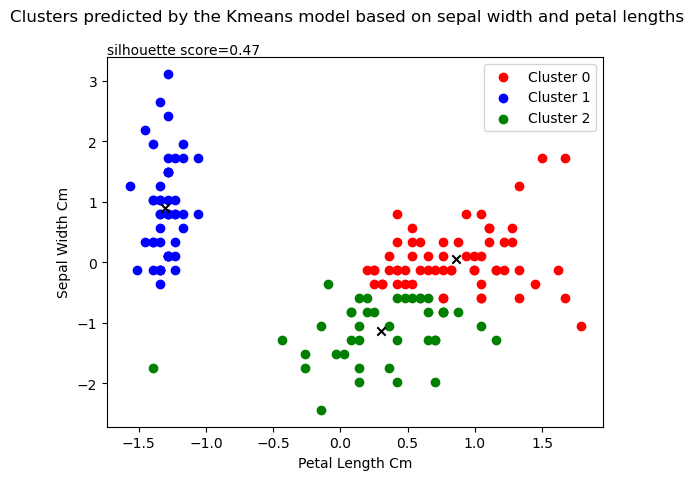

In [244]:
# Visualising 
colours = 'rbgcmy'
for i in range(3):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i,1], c = colours[i], label = 'Cluster {}'.format(i))
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='x', c = 'black')
# Adding the score to the scatterplot:
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.suptitle('Clusters predicted by the Kmeans model based on sepal width and petal lengths')
plt.title('silhouette score={}'.format(score), loc='left', fontdict={'fontsize': 10}, pad=-14)
plt.xlabel('Petal Length Cm')
plt.ylabel('Sepal Width Cm')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

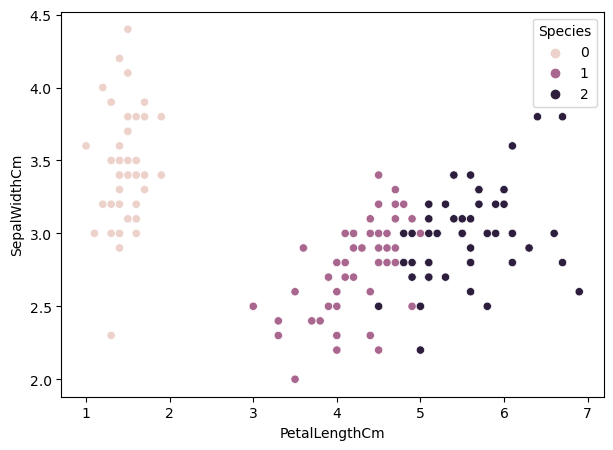

In [245]:
# To compare, let's look at the real distribution of species based on Petal Length and Sepal Width:
fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=iris, x= iris['PetalLengthCm'], y= iris['SepalWidthCm'], hue='Species')

The Silhouette score was only 0.47, which implies the clusters are not well separated. Again, the model had some problems to correctly classify instances to correct species category, especially for species 1 and 2 (Iris virginica and Iris versicolor) - (clusters 1 and 2).